## Chapter 25 Autocorrelation and Partial Autocorrelation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
series = pd.read_csv('data/daily-minimum-temperatures.csv', index_col=0, parse_dates=True)
series.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


#### Correlaion and Autocorrelation

Statistical **correlation** summarizes the strength of the relationship between two variables. We can assume the distribution of each variable fits a Gaussian (bell curve) distribution. If this is
the case, we can use the Pearson’s correlation coeﬃcient to summarize the correlation between the variables. The Pearson’s correlation coeﬃcient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an **autocorrelation**.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym **ACF**. This plot is sometimes called a correlogram or an autocorrelation plot.

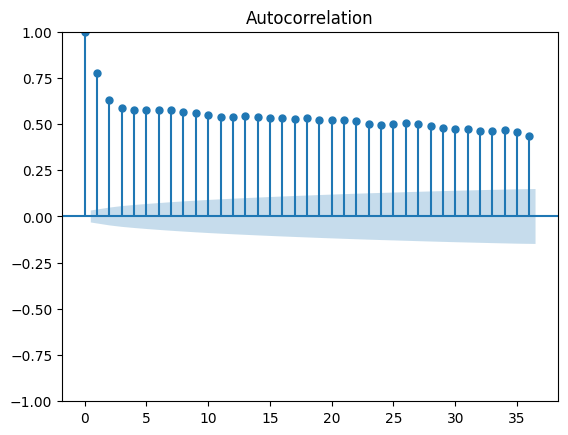

In [5]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series)
plt.show()

unning the example creates a 2D plot showing the lag value along the x-axis and the correlation on the y-axis between -1 and 1. Confidence intervals are drawn as a cone. *By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this cone are very likely a correlation* and not a statistical fluke.

#### Partial Autocorrelation Function

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

The partial autocorrelation at lag k is the correlation that results after removing the eﬀect of any correlations due to the terms at shorter lags.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the *direct correlation and indirect correlations*. These indirect correlations are a linear
function of the correlation of the observation, *with observations at intervening time steps*. It is these indirect correlations that the partial autocorrelation function seeks to remove.

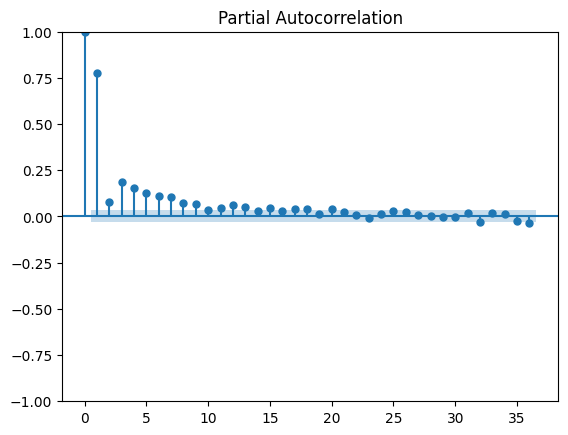

In [6]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series)
plt.show()

#### Intuition for ACF and PACF Plots

Plots of the autocorrelation function and the partial autocorrelation function for a time series tell a very diﬀerent story. We can use the intuition for ACF and PACF above to explore some thought experiments.
- Autoregression Intuition
   - Consider a time series that was generated by an autoregression (AR) process with a lag of k. We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.
   - This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing oﬀ at some point as the eﬀect was weakened.
   - We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k. This is exactly the expectation of the ACF and PACF plots for an AR(k) process.
   - **Helps identify MA (q) order**.
- Moving Average Intuition
  - Consider a time series that was generated by a moving average (MA) process with a lag of k. Remember that *the moving average process is an autoregression model of the time series of residual errors from prior predictions*. Another way to think about the moving average model is that it corrects future forecasts based on errors made on recent forecasts.
  - We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. By definition, this is how the process was generated.
  - For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing oﬀ of correlation from the lag onwards. Again, this is exactly the expectation of the ACF and PACF plots for an MA(k) process.
  - **Helps identify AR (p) order**.

##### 📊 Summary of ACF and PACF Behavior

| Process Type | ACF Behavior | PACF Behavior |
|---------------|---------------|----------------|
| **AR(p)** | Tails off gradually | Cuts off after lag *p* |
| **MA(q)** | Cuts off after lag *q* | Tails off gradually |
| **ARMA(p, q)** | Both tail off gradually | Both tail off gradually |